In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SuperMarketAnalysis - SuperMarketAnalysis.csv to SuperMarketAnalysis - SuperMarketAnalysis.csv


In [ ]:
import pandas as pd

# Load CSV into dataframe
df = pd.read_csv("SuperMarketAnalysis - SuperMarketAnalysis.csv")

# Preview first rows
df.head()

,Invoice,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Standardize column names (all lowercase, underscores instead of spaces)
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
)

# Convert Date column to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Convert Time column to datetime and extract hour
df["hour"] = pd.to_datetime(df["time"], format="%H:%M", errors="coerce").dt.hour

# Make sure total sales (quantity * unit_price) is available
if "total" not in df.columns:
    df["total"] = df["quantity"] * df["unit_price"]

# Quick check
print(df.columns)
df.head()

Index(['invoice', 'branch', 'city', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax_5%', 'sales', 'date', 'time', 'payment',
       'cogs', 'gross_margin_percentage', 'gross_income', 'rating', 'hour',
       'total'],
      dtype='object')


,invoice,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,hour,total
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,NaN,522.83
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,NaN,76.40
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,NaN,324.31
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,NaN,465.76
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,NaN,604.17


In [ ]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
)
print(df.columns)

Index(['invoice', 'branch', 'city', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax_5%', 'sales', 'date', 'time', 'payment',
       'cogs', 'gross_margin_percentage', 'gross_income', 'rating', 'hour',
       'total'],
      dtype='object')


In [ ]:
# Count nulls
print(df.isnull().sum())

# Drop rows missing critical fields (e.g., invoice, product_line, quantity, unit_price)
df = df.dropna(subset=["invoice", "product_line", "quantity", "unit_price"])

# Fill remaining nulls
df["customer_type"] = df["customer_type"].fillna("Unknown")
df["gender"] = df["gender"].fillna("Unknown")
df["payment"] = df["payment"].fillna("Unknown")

invoice                       0
branch                        0
city                          0
customer_type                 0
gender                        0
product_line                  0
unit_price                    0
quantity                      0
tax_5%                        0
sales                         0
date                          0
time                          0
payment                       0
cogs                          0
gross_margin_percentage       0
gross_income                  0
rating                        0
hour                       1000
total                         0
dtype: int64


In [ ]:
# Convert dates
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Convert time & extract hour
df["time"] = pd.to_datetime(df["time"], format="%H:%M", errors="coerce").dt.time
df["hour"] = pd.to_datetime(df["time"].astype(str), errors="coerce").dt.hour

# Convert numeric columns
numeric_cols = ["unit_price", "quantity", "tax_5%", "total", "cogs", "gross_margin_percentage", "gross_income", "rating"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")

Removed 0 duplicate rows


In [ ]:
# Example: gender column
if "gender" in df.columns:
    df["gender"] = df["gender"].str.strip().str.title()  # "Male", "Female", not "male "

# Example: customer_type column
if "customer_type" in df.columns:
    df["customer_type"] = df["customer_type"].str.strip().str.title()

# Example: payment methods
if "payment" in df.columns:
    df["payment"] = df["payment"].str.strip().str.title()

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice                  1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   sales                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     0 non-null      datetime64[ns]
 12  payment                  1000 non-n

,invoice,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,hour,total
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,NaT,Ewallet,522.83,4.761905,26.1415,9.1,NaN,522.83
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,NaT,Cash,76.40,4.761905,3.8200,9.6,NaN,76.40
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,NaT,Credit Card,324.31,4.761905,16.2155,7.4,NaN,324.31
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,NaT,Ewallet,465.76,4.761905,23.2880,8.4,NaN,465.76
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,NaT,Ewallet,604.17,4.761905,30.2085,5.3,NaN,604.17


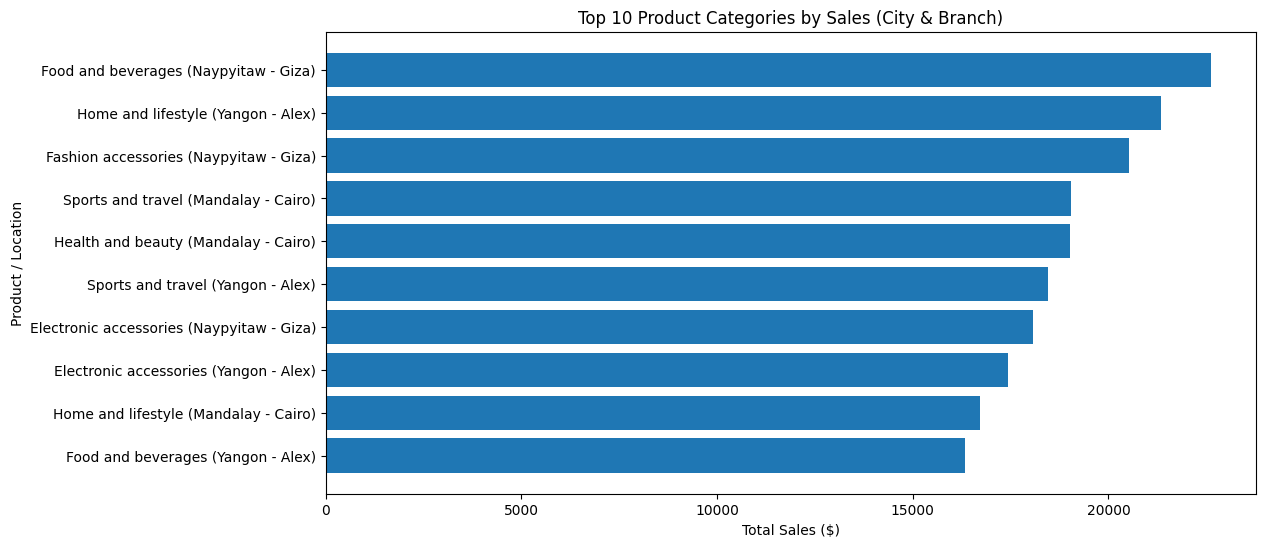

In [24]:
import matplotlib.pyplot as plt

# Group by city, branch, product_line
top_products = (
    df.groupby(["city", "branch", "product_line"])["total"]
      .sum()
      .reset_index()
      .sort_values("total", ascending=False)
)

# Plot top 10
plt.figure(figsize=(12,6))
top10 = top_products.head(10)
plt.barh(top10["product_line"] + " (" + top10["city"] + " - " + top10["branch"] + ")", top10["total"])
plt.xlabel("Total Sales ($)")
plt.ylabel("Product / Location")
plt.title("Top 10 Product Categories by Sales (City & Branch)")
plt.gca().invert_yaxis()
plt.show()


In [30]:
print(df["Time"].head(20))

0      1:08:00 PM
1     10:29:00 AM
2      1:23:00 PM
3      8:33:00 PM
4     10:37:00 AM
5      6:30:00 PM
6      2:36:00 PM
7     11:38:00 AM
8      5:15:00 PM
9      1:27:00 PM
10     6:07:00 PM
11     5:03:00 PM
12    10:25:00 AM
13     4:48:00 PM
14     7:21:00 PM
15     4:19:00 PM
16    11:03:00 AM
17    10:39:00 AM
18     6:00:00 PM
19     3:30:00 PM
Name: Time, dtype: object


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Rebuild HOUR robustly from the time column ---
# Ensure we have a string column to parse
t = df["Time"].astype(str).str.strip()

# 1) Try general parse (lets pandas infer)
parsed = pd.to_datetime(t, errors="coerce")

# 2) If too many NaT, try common explicit formats and coalesce
if parsed.isna().mean() > 0.5:
    parsed_alt1 = pd.to_datetime(t, format="%I:%M %p", errors="coerce")   # e.g., 1:08 PM
    parsed_alt2 = pd.to_datetime(t, format="%H:%M", errors="coerce")      # e.g., 13:08
    parsed_alt3 = pd.to_datetime(t, format="%H:%M:%S", errors="coerce")   # e.g., 13:08:00
    parsed = parsed.fillna(parsed_alt1).fillna(parsed_alt2).fillna(parsed_alt3)

df["hour"] = parsed.dt.hour

# --- Ensure TOTAL is numeric (rebuild if missing) ---
if "total" not in df.columns or not np.issubdtype(df["total"].dtype, np.number):
    qty_col = "quantity" if "quantity" in df.columns else None
    price_col = "unit_price" if "unit_price" in df.columns else ("price" if "price" in df.columns else None)
    if qty_col and price_col:
        df["total"] = pd.to_numeric(df[qty_col], errors="coerce") * pd.to_numeric(df[price_col], errors="coerce")
    else:
        # fallback: try to coerce existing total
        if "total" in df.columns:
            df["total"] = pd.to_numeric(df["total"], errors="coerce")

# --- Quick diagnostics if still empty ---
print("Example time values:", t.head().tolist())
print("Parsed hours:", df["hour"].head().tolist())
print("Hour NaN ratio:", df["hour"].isna().mean())

# --- Now compute and plot sales by hour ---
sales_by_hour = (
    df.dropna(subset=["hour", "total"])
      .groupby("hour")["total"]
      .sum()
      .sort_index()
)

if sales_by_hour.empty:
    print("⚠️ sales_by_hour is empty. Check that 'time' parses and 'total' is numeric.")
else:
    plt.figure(figsize=(12,6))
    sales_by_hour.plot(kind="bar")
    plt.title("Total Sales by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Total Sales ($)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Example time values: ['1:08:00 PM', '10:29:00 AM', '1:23:00 PM', '8:33:00 PM', '10:37:00 AM']
Parsed hours: [13, 10, 13, 20, 10]
Hour NaN ratio: 0.0


/tmp/ipython-input-3720297736.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(t, errors="coerce")


KeyError: ['total']

Example time strings: ['1:08:00 PM', '10:29:00 AM', '1:23:00 PM', '8:33:00 PM', '10:37:00 AM']
Parsed hours: [13, 10, 13, 20, 10]
Hour NaN ratio: 0.0
Using total column: sales


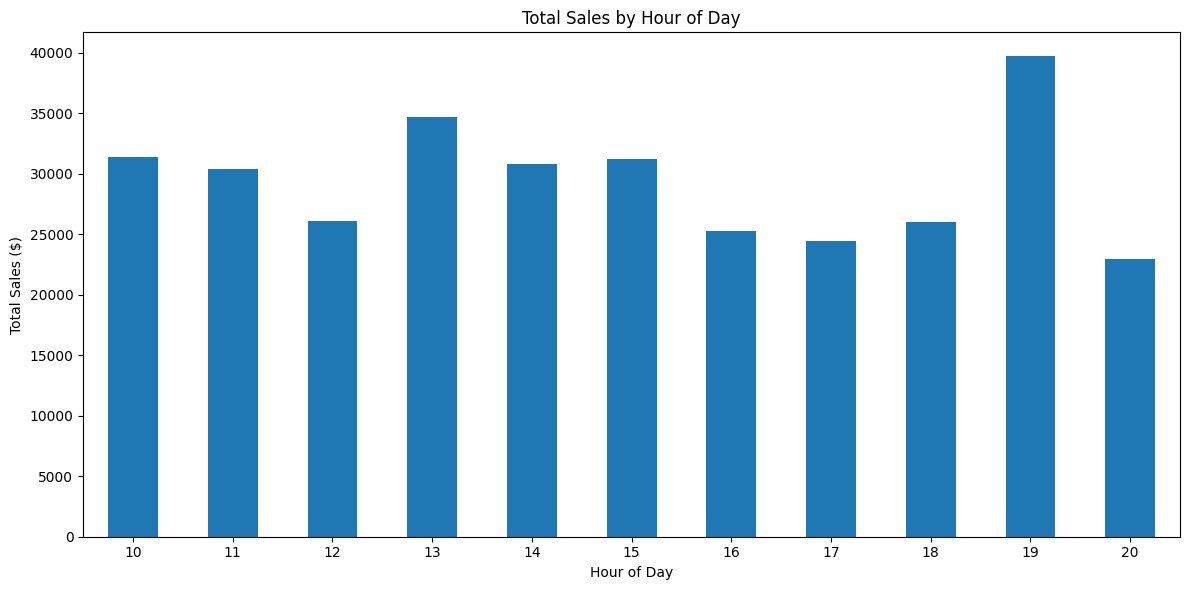

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 0) Standardize column names (keeps a copy of original names for mapping) ---
orig_cols = dict((c.lower().strip(), c) for c in df.columns)  # map lower->original
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(r"\s+", "_", regex=True))

# --- 1) Parse hour from Time ---
# handle both 'time' and 'Time' originals
time_col = None
for c in ["time", "order_time"]:
    if c in df.columns:
        time_col = c
        break
if time_col is None:
    # try to find original 'Time' before standardization
    if "time" in orig_cols:
        time_col = "time"
        df[time_col] = df[orig_cols["time"]]

if time_col is None:
    raise ValueError("Couldn't find a time column. Columns are: " + ", ".join(df.columns))

# Try exact format first, then fallbacks
t = df[time_col].astype(str).str.strip()
parsed = pd.to_datetime(t, format="%I:%M:%S %p", errors="coerce")  # e.g., 1:08:00 PM
if parsed.isna().mean() > 0.5:
    parsed = pd.to_datetime(t, format="%I:%M %p", errors="coerce")  # e.g., 1:08 PM
if parsed.isna().mean() > 0.5:
    parsed = pd.to_datetime(t, format="%H:%M", errors="coerce")     # e.g., 13:08
if parsed.isna().mean() > 0.5:
    parsed = pd.to_datetime(t, errors="coerce")                     # last resort

df["hour"] = parsed.dt.hour

# --- 2) Ensure TOTAL exists and is numeric ---
# Column candidates (standardized)
qty_cands   = [c for c in ["quantity", "qty"] if c in df.columns]
price_cands = [c for c in ["unit_price", "price"] if c in df.columns]
total_cands = [c for c in ["total", "sales", "amount"] if c in df.columns]

if total_cands:
    # coerce existing total to numeric
    totcol = total_cands[0]
    df[totcol] = pd.to_numeric(df[totcol], errors="coerce")
else:
    if not qty_cands or not price_cands:
        raise ValueError("No total column found and cannot compute it (need quantity and unit_price/price). "
                         f"Columns present: {df.columns.tolist()}")
    qcol = qty_cands[0]
    pcol = price_cands[0]
    df["total"] = pd.to_numeric(df[qcol], errors="coerce") * pd.to_numeric(df[pcol], errors="coerce")
    totcol = "total"

# --- 3) Quick diagnostics ---
print("Example time strings:", t.head().tolist())
print("Parsed hours:", df["hour"].head().tolist())
print("Hour NaN ratio:", df["hour"].isna().mean())
print("Using total column:", totcol)

# --- 4) Q2: Sales by hour ---
sales_by_hour = (
    df.dropna(subset=["hour", totcol])
      .groupby("hour")[totcol]
      .sum()
      .sort_index()
)

if sales_by_hour.empty:
    print("⚠️ sales_by_hour is empty. Check that 'hour' parsed and total column is numeric.")
else:
    plt.figure(figsize=(12,6))
    sales_by_hour.plot(kind="bar")
    plt.title("Total Sales by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Total Sales ($)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [39]:
print(df.columns.tolist()[:30])

df.head(3)

['invoice', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'unit_price', 'quantity', 'tax_5%', 'sales', 'date', 'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating', 'hour']


,invoice,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,13


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (Safe) standardize columns
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(r"\s+", "_", regex=True))

# Ensure a usable 'sales' column
if "sales" not in df.columns:
    if "total" in df.columns:
        df["sales"] = pd.to_numeric(df["total"], errors="coerce")
    elif "quantity" in df.columns and ("unit_price" in df.columns or "price" in df.columns):
        price_col = "unit_price" if "unit_price" in df.columns else "price"
        df["sales"] = pd.to_numeric(df["quantity"], errors="coerce") * pd.to_numeric(df[price_col], errors="coerce")
    else:
        raise ValueError("No 'sales' column found and cannot compute it.")

# Final coercion just in case
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")

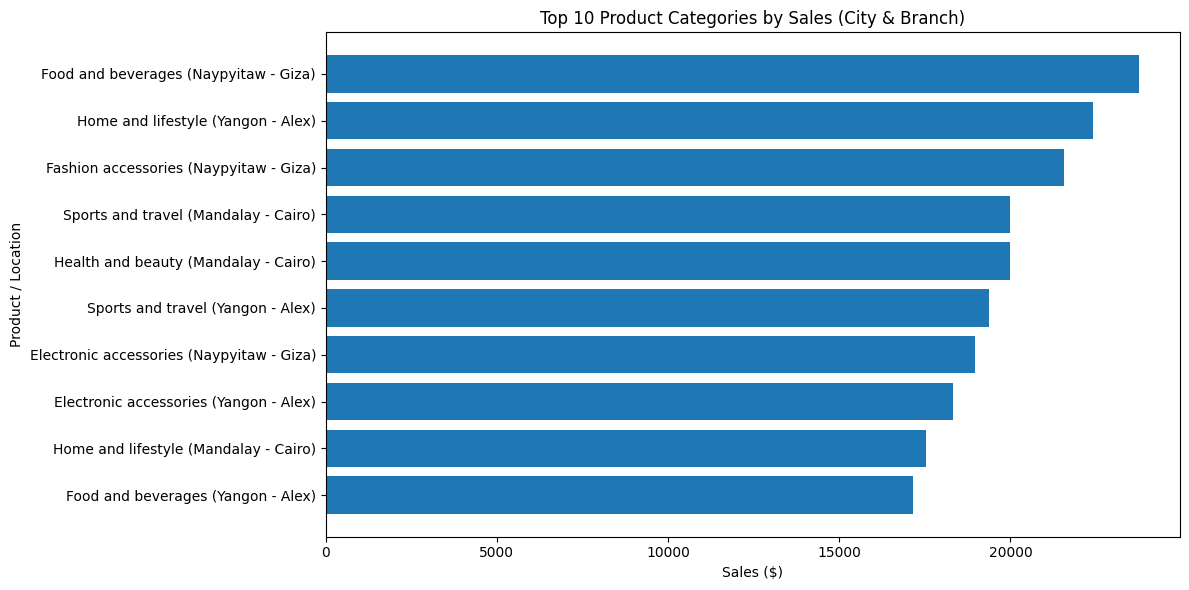

In [43]:
top_products = (
    df.dropna(subset=["city","branch","product_line","sales"])
      .groupby(["city","branch","product_line"])["sales"]
      .sum()
      .reset_index()
      .sort_values("sales", ascending=False)
)

plt.figure(figsize=(12,6))
top10 = top_products.head(10)
labels = top10["product_line"] + " (" + top10["city"] + " - " + top10["branch"] + ")"
plt.barh(labels, top10["sales"])
plt.xlabel("Sales ($)")
plt.ylabel("Product / Location")
plt.title("Top 10 Product Categories by Sales (City & Branch)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

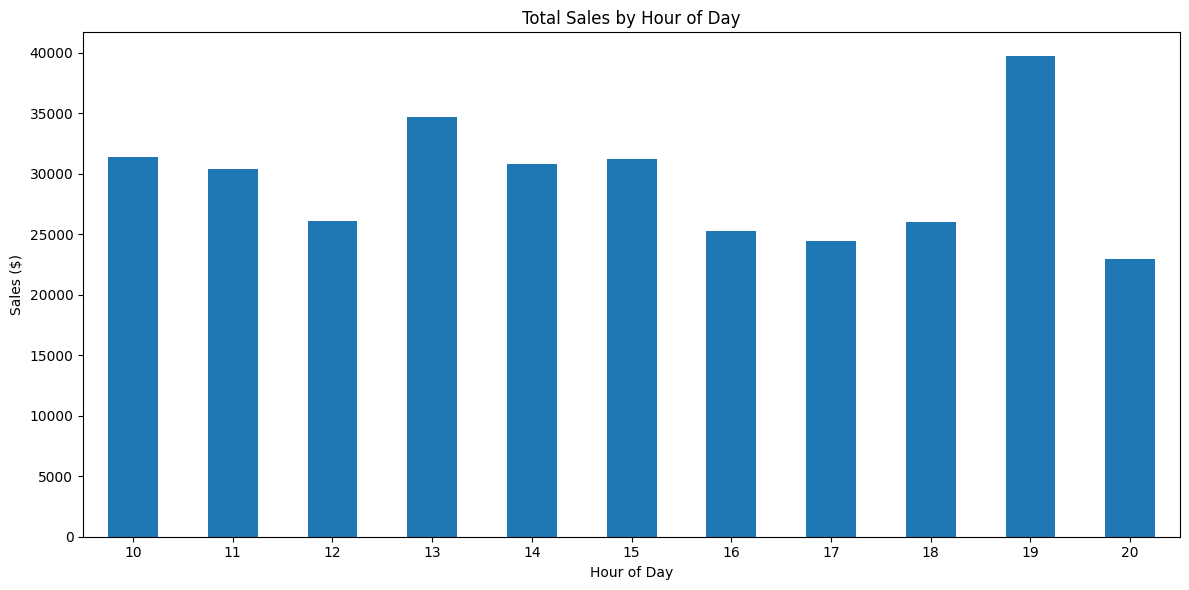

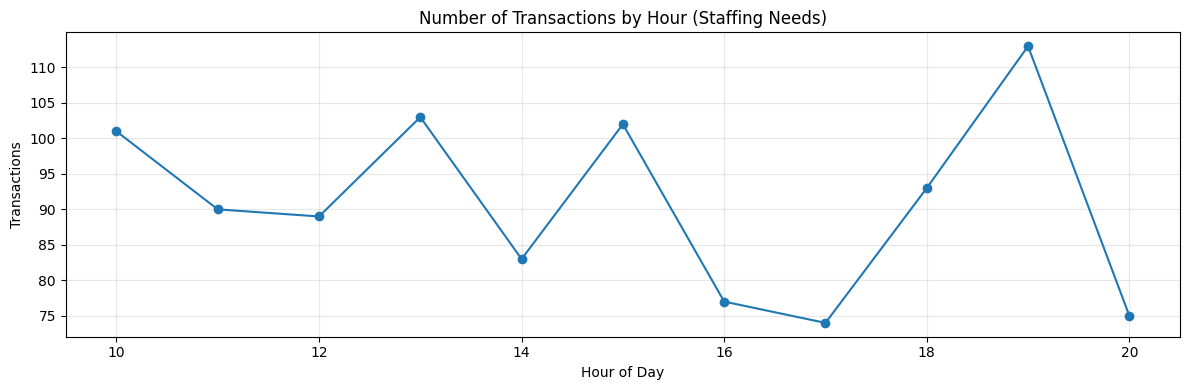

In [45]:
# assumes you already created df["hour"] correctly
sales_by_hour = (
    df.dropna(subset=["hour","sales"])
      .groupby("hour")["sales"]
      .sum()
      .sort_index()
)

plt.figure(figsize=(12,6))
sales_by_hour.plot(kind="bar")
plt.title("Total Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Sales ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# (Optional) transactions by hour for staffing
tx_by_hour = df.dropna(subset=["hour"]).groupby("hour")["invoice"].count()
plt.figure(figsize=(12,4))
tx_by_hour.plot(kind="line", marker="o")
plt.title("Number of Transactions by Hour (Staffing Needs)")
plt.xlabel("Hour of Day")
plt.ylabel("Transactions")
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()

Top 5 product lines by revenue:
product_line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Name: sales, dtype: float64


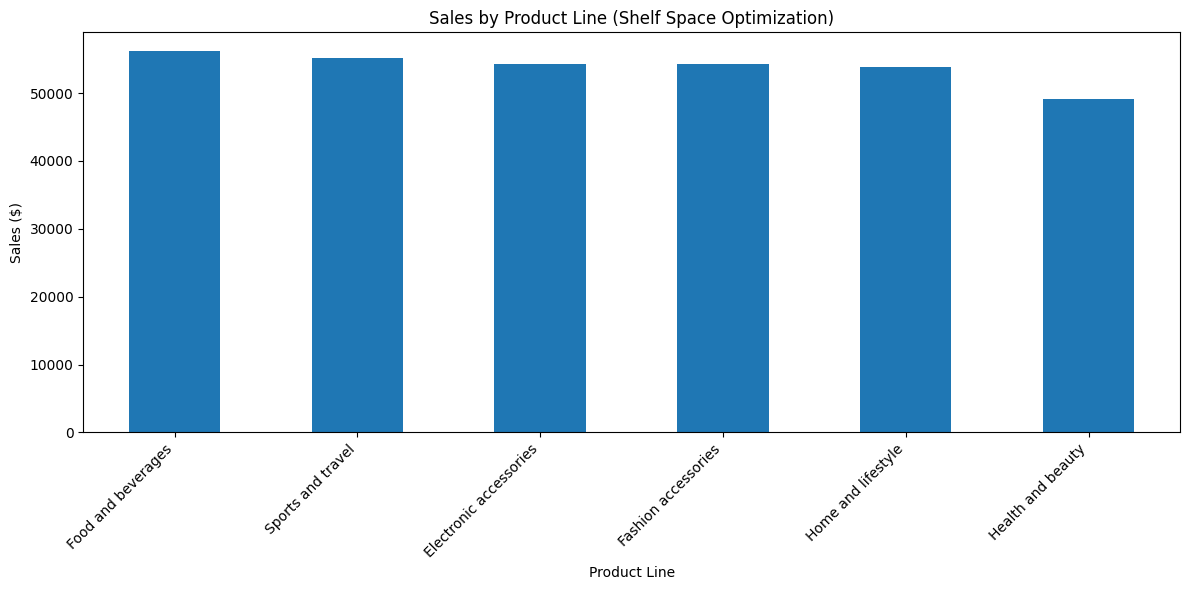


Sales share (%) by product line:
 product_line
Food and beverages        17.4
Sports and travel         17.1
Electronic accessories    16.8
Fashion accessories       16.8
Home and lifestyle        16.7
Health and beauty         15.2
Name: sales, dtype: float64


In [46]:
sales_by_product = (
    df.dropna(subset=["product_line","sales"])
      .groupby("product_line")["sales"]
      .sum()
      .sort_values(ascending=False)
)

print("Top 5 product lines by revenue:")
print(sales_by_product.head(5))

plt.figure(figsize=(12,6))
sales_by_product.plot(kind="bar")
plt.title("Sales by Product Line (Shelf Space Optimization)")
plt.xlabel("Product Line")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# (Optional) show sales share % for each product line
share = (sales_by_product / sales_by_product.sum() * 100).round(1)
print("\nSales share (%) by product line:\n", share)

In [47]:
import matplotlib.pyplot as plt

def add_value_labels(ax, fmt=lambda v: f"${v:,.0f}"):
    """
    Add numeric labels to bars in a bar or barh chart.
    - For vertical bars: label above the bar
    - For horizontal bars: label at the end of the bar
    """
    for p in ax.patches:
        if p.get_width() > p.get_height():  # heuristic: horizontal bars
            val = p.get_width()
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.text(x, y, fmt(val), va="center", ha="left", fontsize=10)
        else:  # vertical bars
            val = p.get_height()
            x = p.get_x() + p.get_width()/2
            y = p.get_y() + p.get_height()
            ax.text(x, y, fmt(val), va="bottom", ha="center", fontsize=10)

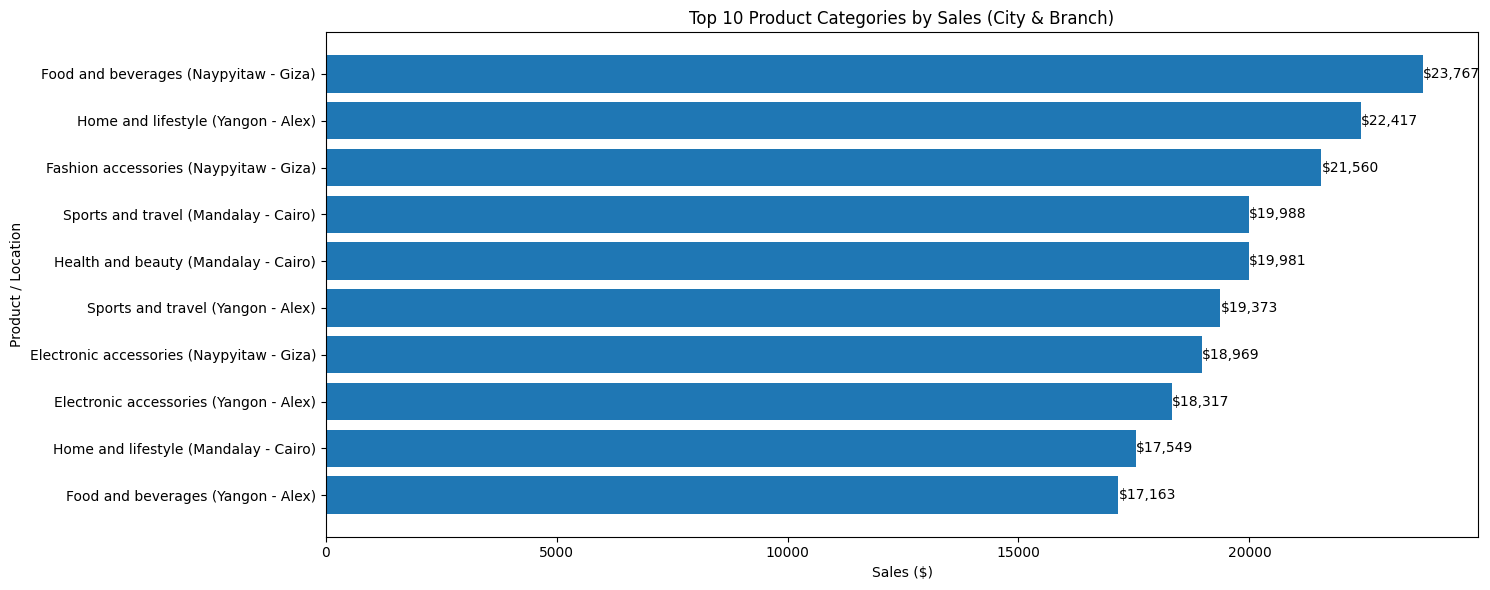

Takeaway: Highest revenue was Food and beverages at Naypyitaw (Branch Giza) with sales of $23,767.


In [50]:
top_products = (
    df.dropna(subset=["city","branch","product_line","sales"])
      .groupby(["city","branch","product_line"])["sales"]
      .sum()
      .reset_index()
      .sort_values("sales", ascending=False)
)

top10 = top_products.head(10)
labels = top10["product_line"] + " (" + top10["city"] + " - " + top10["branch"] + ")"

plt.figure(figsize=(15,6))
ax = plt.barh(labels, top10["sales"])
plt.xlabel("Sales ($)")
plt.ylabel("Product / Location")
plt.title("Top 10 Product Categories by Sales (City & Branch)")
plt.gca().invert_yaxis()
add_value_labels(plt.gca(), fmt=lambda v: f"${v:,.0f}")
plt.tight_layout()
plt.show()

# Plain-English caption
winner = top10.iloc[0]
print(
    f"Takeaway: Highest revenue was {winner['product_line']} at {winner['city']} (Branch {winner['branch']}) "
    f"with sales of ${winner['sales']:,.0f}."
)

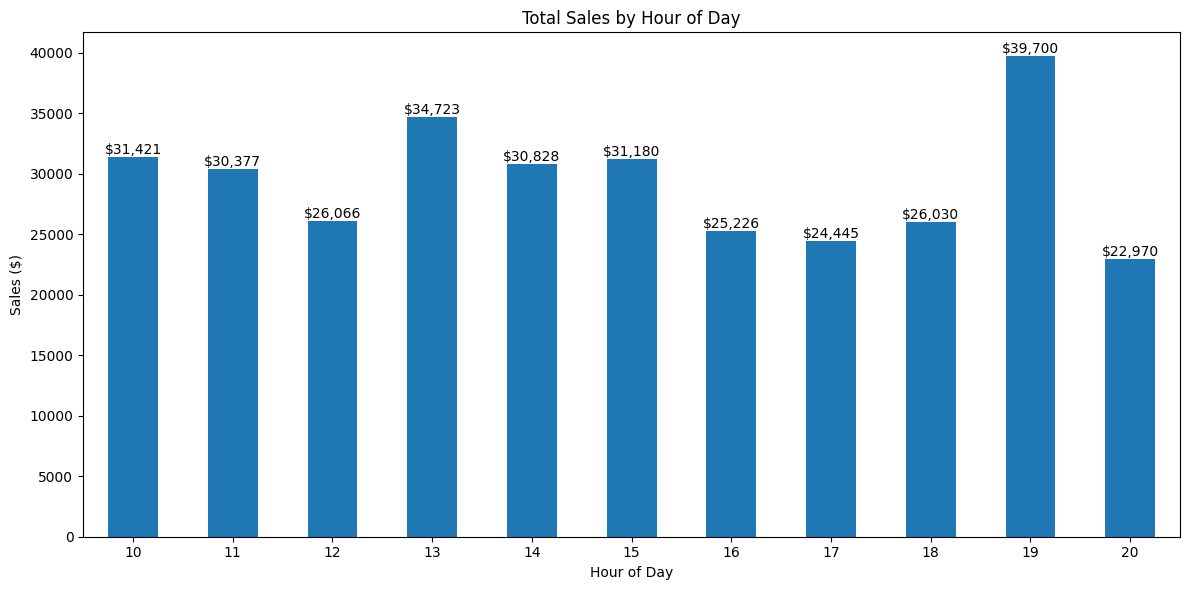

Takeaway: Peak sales occur around 19:00 with $39,700 in revenue. Staffing should be strongest around this window.


In [51]:
sales_by_hour = (
    df.dropna(subset=["hour","sales"])
      .groupby("hour")["sales"]
      .sum()
      .sort_index()
)

plt.figure(figsize=(12,6))
ax = sales_by_hour.plot(kind="bar")
plt.title("Total Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Sales ($)")
plt.xticks(rotation=0)
add_value_labels(plt.gca(), fmt=lambda v: f"${v:,.0f}")
plt.tight_layout()
plt.show()

# Plain-English caption
peak_hr = sales_by_hour.idxmax()
peak_val = sales_by_hour.max()
print(
    f"Takeaway: Peak sales occur around {peak_hr}:00 with ${peak_val:,.0f} in revenue. "
    "Staffing should be strongest around this window."
)

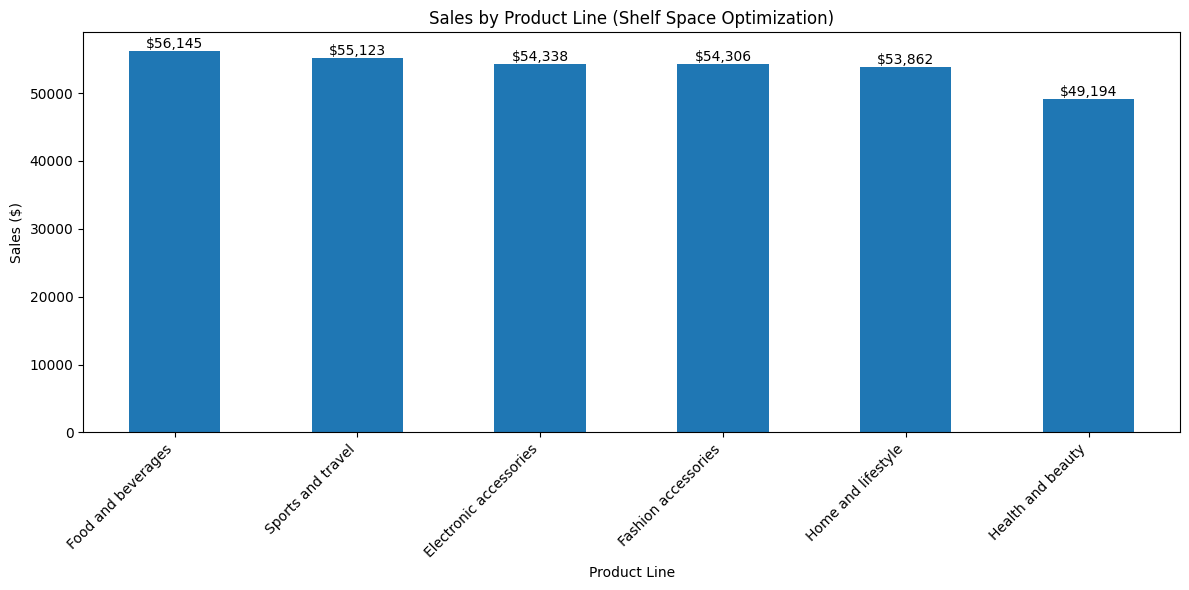

Takeaway: Food and beverages leads with 17.4% of sales, followed by Sports and travel at 17.1%. Prioritize shelf space and promotion for top categories; review bottom performers for rationalization.


In [52]:
sales_by_product = (
    df.dropna(subset=["product_line","sales"])
      .groupby("product_line")["sales"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
ax = sales_by_product.plot(kind="bar")
plt.title("Sales by Product Line (Shelf Space Optimization)")
plt.xlabel("Product Line")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45, ha="right")
add_value_labels(plt.gca(), fmt=lambda v: f"${v:,.0f}")
plt.tight_layout()
plt.show()

# Plain-English caption
share = (sales_by_product / sales_by_product.sum() * 100)
p1, p2 = sales_by_product.index[0], sales_by_product.index[1]
print(
    f"Takeaway: {p1} leads with {share.iloc[0]:.1f}% of sales, followed by {p2} at {share.iloc[1]:.1f}%. "
    "Prioritize shelf space and promotion for top categories; review bottom performers for rationalization."
)